<a href="https://colab.research.google.com/github/Abhay069/Assingnment-Primetrade.ai/blob/main/Assingnment_(Primetrade_ai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading Dataset into pandas dataframe
greed_index =  pd.read_csv("/content/fear_greed_index.csv")
print("greed_index:")
print(greed_index.head())
print("\n---------------------------------------------------")
historical_data = pd.read_csv("/content/historical_data.csv")
print("historical_data:")
historical_data.head()

greed_index:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

---------------------------------------------------


/tmp/ipython-input-609910584.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  historical_data = pd.read_csv("/content/historical_data.csv")


historical_data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Clean Data

In [15]:
print("Cleaning historical (trader) data")
historical_data['datetime'] = pd.to_datetime(historical_data['Timestamp'], unit='ms')
# Convert columns to numeric using the exact names from your file
historical_data['Execution Price'] = pd.to_numeric(historical_data['Execution Price'], errors='coerce')
historical_data['Size Tokens'] = pd.to_numeric(historical_data['Size Tokens'], errors='coerce')
historical_data['Size USD'] = pd.to_numeric(historical_data['Size USD'], errors='coerce')
historical_data['Closed PnL'] = pd.to_numeric(historical_data['Closed PnL'], errors='coerce')

# Create a 'Date' column (without time) to merge with sentiment data
historical_data['Date'] = historical_data['datetime'].dt.date
print("Finished cleaning historical data.")

# --- Clean Sentiment Data (greed_index) ---
print("Cleaning sentiment (greed) data...")

# the date column is 'date' and has format 'DD-MM-YYYY'
greed_index['Date'] = pd.to_datetime(greed_index['date'], format='%Y-%m-%d')
greed_index['Date'] = greed_index['Date'].dt.date
print("Finished cleaning sentiment data.")
print("\n---------------------------------------------------")

# --- Check for missing values ---
print("\nMissing values in Trader Data (historical_data):")
print(historical_data.isnull().sum())
print("\nMissing values in Sentiment Data (greed_index):")
print(greed_index.isnull().sum())
print("\n---------------------------------------------------")

# Handle missing values
# Drop rows where the key financial data is missing
print("Dropping rows with NaN values from historical_data...")
historical_data = historical_data.dropna(subset=['Closed PnL', 'Size Tokens', 'Size USD', 'Execution Price'])

# printing the values
print("Data cleaning complete.")
print("\nClean historical_data head:")
print(historical_data.head())
print("\nClean greed_index head:")
print(greed_index.head())

Cleaning historical (trader) data
Finished cleaning historical data.
Cleaning sentiment (greed) data...
Finished cleaning sentiment data.

---------------------------------------------------

Missing values in Trader Data (historical_data):
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 1
Trade ID            1
Timestamp           1
datetime            1
Date                1
dtype: int64

Missing values in Sentiment Data (greed_index):
timestamp         0
value             0
classification    0
date              0
Date              0
dtype: int64

---------------------------------------------------
Dropping rows with NaN values from historical_data...
Data cleaning complete.

Clean historical_data head:
                            

Merge Datasets

In [17]:
# Merge the two dataframes
print("Merging dataframes as 'df_merged'")
df_merged = pd.merge(historical_data, greed_index, on='Date', how='left')
df_merged = df_merged.dropna(subset=['classification'])

print("\nMerged Data Head:")
print(df_merged.head())

Merging dataframes as 'df_merged'

Merged Data Head:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL  ... Crossed       Fee      Trade ID 

Analysis & Visualization


--- Analysis 1: Profitability vs. Sentiment ---
classification
Extreme Greed     26.320044
Fear             146.697176
Greed            227.985056
Neutral           56.800214
Name: Closed PnL, dtype: float64


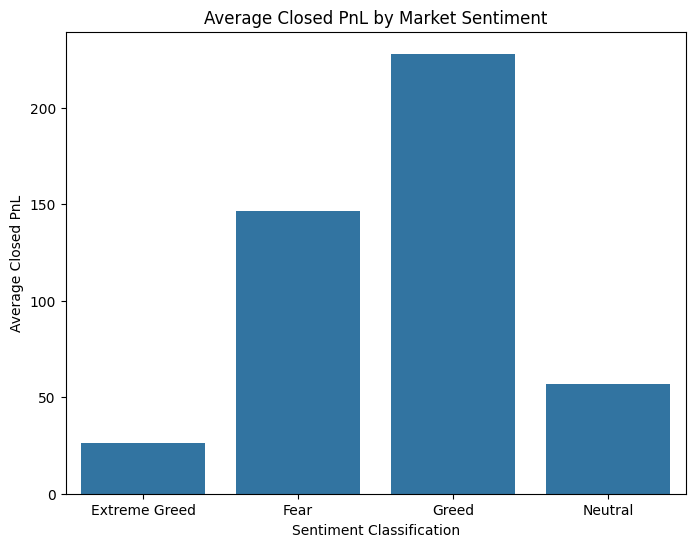

In [20]:
# save the image files.
output_path = '/content/'

# --- Analysis 1: Profitability (PnL) vs. Sentiment ---
print("\n--- Analysis 1: Profitability vs. Sentiment ---")
pnl_by_sentiment = df_merged.groupby('classification')['Closed PnL'].mean()
print(pnl_by_sentiment)

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values)
plt.title('Average Closed PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Sentiment Classification')
plt.savefig(f'{output_path}pnl_vs_sentiment.png')
plt.show()



--- Analysis 2: Volume vs. Sentiment ---
classification
Extreme Greed    3.932446e+07
Fear             3.331508e+08
Greed            6.013086e+07
Neutral          1.850155e+07
Name: Size USD, dtype: float64


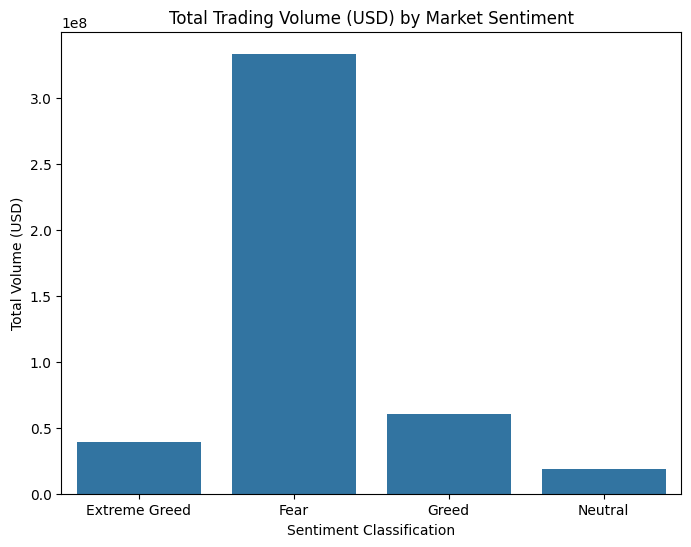

In [21]:
# --- Analysis 2: Trading Volume vs. Sentiment ---
print("\n--- Analysis 2: Volume vs. Sentiment ---")
volume_by_sentiment = df_merged.groupby('classification')['Size USD'].sum()
print(volume_by_sentiment)

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values)
plt.title('Total Trading Volume (USD) by Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.xlabel('Sentiment Classification')
plt.savefig(f'{output_path}volume_vs_sentiment.png')
plt.show()


--- Analysis 3: Trader Side vs. Sentiment ---
Side                 BUY      SELL
classification                    
Extreme Greed   0.485508  0.514492
Fear            0.496115  0.503885
Greed           0.406966  0.593034
Neutral         0.539757  0.460243


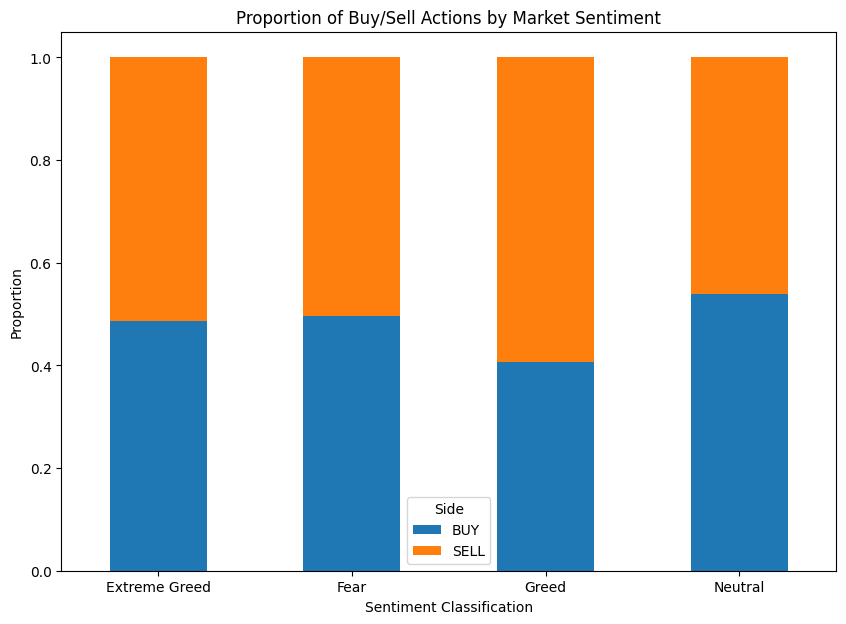


 All analyses complete. Plots saved to /content/ on my drive 


In [22]:
# --- Analysis 3: Trader Side (Buy/Sell) vs. Sentiment ---
print("\n--- Analysis 3: Trader Side vs. Sentiment ---")
side_crosstab = pd.crosstab(df_merged['classification'], df_merged['Side'], normalize='index')
print(side_crosstab)

# Visualize
side_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Proportion of Buy/Sell Actions by Market Sentiment')
plt.ylabel('Proportion')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=0)
plt.legend(title='Side')
plt.savefig(f'{output_path}side_vs_sentiment.png')
plt.show()

print("\n All analyses complete. Plots saved to /content/ on my drive ")